In [1]:
import os
os.chdir('..')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns

import json

import numpy as np

sns.set(font_scale=1.5)

results_folder = './server/percentage_hybrid/results/'
figures = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
with open(results_folder + 'res.json', 'r') as infile:
    data = json.load(infile)

In [4]:
x_vals = ['bfgs-inv']
for v in data['percs']:
    x_vals.append(str(v))
    
x_vals.append('hess')

In [5]:
x_str = ['BFGS$^{-1}$']

for v in data['percs']:
    x_str.append('{:d}%'.format(int(v*100)))
    
x_str.append('Hess')

In [6]:
y_vals = []
for x in x_vals:
    y_vals.append(data[x]['time'])

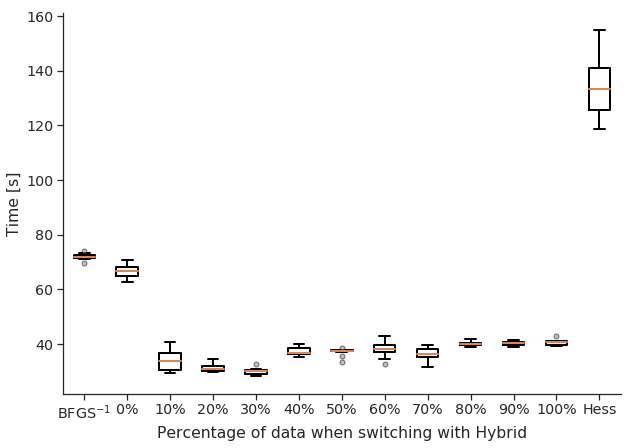

In [10]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

flierprops = dict(markerfacecolor='grey', markersize=5, alpha=0.5, linestyle='none')

bp = plt.boxplot(y_vals, flierprops=flierprops)

for box in bp['boxes']:
    # change outline color
    box.set(linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(linewidth=2)

plt.xticks(range(1, len(y_vals)+1), x_str)
plt.ylabel('Time [s]')
plt.xlabel('Percentage of data when switching with Hybrid')

plt.savefig(figures + 'pdf/perc_hybrid.pdf', bbox_inches='tight')
plt.savefig(figures + 'png/perc_hybrid.png', bbox_inches='tight')

Text(0.5, 0, 'Number of batch update')

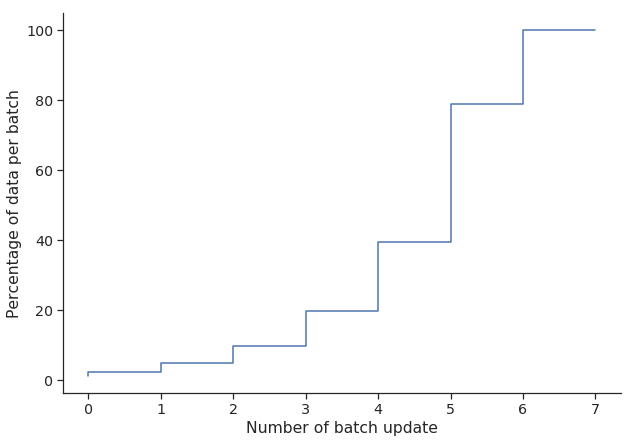

In [46]:
max_data = 81086
start_data = 1000

data = start_data

batches = [data]

while data != max_data:
    data *= 2
    
    if data > max_data:
        data = max_data
            
    batches.append(data)
    
batches = np.array(batches)/max_data*100

plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.step(range(len(batches)), batches)
plt.ylabel("Percentage of data per batch")
plt.xlabel("Number of batch update")

Text(0.5, 0, 'Number of batch update')

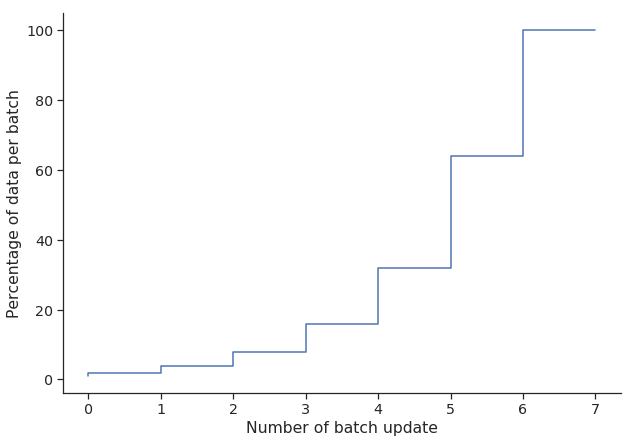

In [68]:
max_data = 81086
start_data = int(0.01*81086)

data = start_data

batches = [data]

while data != max_data:
    data *= 2
    
    if data > max_data:
        data = max_data
            
    batches.append(data)
    
batches = np.array(batches)/max_data*100

plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.step(range(len(batches)), batches)
plt.ylabel("Percentage of data per batch")
plt.xlabel("Number of batch update")

In [69]:
start_data

810

In [70]:
batches

array([  0.9989394 ,   1.9978788 ,   3.99575759,   7.99151518,
        15.98303036,  31.96606073,  63.93212145, 100.        ])